## Data Ingestion and Preprocessing

In [571]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [572]:
# Loading airbnb data of 8 cities
montreal = pd.read_csv('Dataset/Airbnb/Montreal.csv')
newbrunswick = pd.read_csv('Dataset/Airbnb/NewBrunswick.csv')
ottawa = pd.read_csv('Dataset/Airbnb/Ottawa.csv')
quebeccity = pd.read_csv('Dataset/Airbnb/QuebecCity.csv')
toronto = pd.read_csv('Dataset/Airbnb/Toronto.csv')
vancouver = pd.read_csv('Dataset/Airbnb/Vancouver.csv')
victoria = pd.read_csv('Dataset/Airbnb/Victoria.csv')
winnipeg = pd.read_csv('Dataset/Airbnb/Winnipeg.csv')


# Adding a City column to each dataframes
montreal['City'] = 'Montreal'
newbrunswick['City'] = 'New Brunswick'
ottawa['City'] = 'Ottawa'
quebeccity['City'] = 'Quebec City'
toronto['City'] = 'Toronto'
vancouver['City'] = 'Vancouver'
victoria['City'] = 'Victoria'
winnipeg['City'] = 'Winnipeg'

# Merging data from different cities to a single dataframe
airbnb_df = pd.concat([montreal, newbrunswick, ottawa, quebeccity, toronto, vancouver, victoria, winnipeg], ignore_index=True)

In [573]:
airbnb_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.963600e+04,4.963600e+04,4.963600e+04,49634.000000,49634.000000,49636.000000,49636.000000,49636.000000,41614.000000,47525.000000,...,39411.000000,39409.000000,39410.000000,39408.000000,39408.000000,49636.000000,49636.000000,49636.000000,49636.000000,39455.000000
mean,4.951017e+17,2.024044e+13,2.105296e+08,11.428295,17.965447,45.707282,-86.409358,3.524438,1.285108,1.579611,...,4.761674,4.858577,4.865958,4.818533,4.702363,7.261181,5.442683,1.745890,0.045350,1.565113
std,4.590541e+17,8.492157e+07,1.879092e+08,38.390107,62.737442,2.160301,19.477610,2.267403,0.691533,1.035723,...,0.385802,0.313433,0.314090,0.285152,0.393191,16.049818,14.697855,6.346418,0.750822,1.860575
min,1.419000e+03,2.024032e+13,1.565000e+03,1.000000,1.000000,43.585750,-124.421850,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.509048e+07,2.024032e+13,3.825061e+07,1.000000,1.000000,43.674331,-79.558415,2.000000,1.000000,1.000000,...,4.690000,4.840000,4.860000,4.750000,4.630000,1.000000,1.000000,0.000000,0.000000,0.290000
50%,6.506540e+17,2.024050e+13,1.482152e+08,2.000000,3.000000,45.464161,-79.387940,3.000000,1.000000,1.000000,...,4.880000,4.950000,4.960000,4.900000,4.800000,2.000000,1.000000,0.000000,0.000000,0.900000
75%,9.335297e+17,2.024051e+13,3.899223e+08,6.000000,9.000000,47.364125,-73.606614,4.000000,1.500000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.930000,5.000000,2.000000,1.000000,0.000000,2.250000
max,1.151772e+18,2.024051e+13,5.764085e+08,692.000000,2046.000000,49.973760,-63.775060,16.000000,46.000000,50.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,123.000000,123.000000,92.000000,24.000000,57.170000


In [574]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49636 entries, 0 to 49635
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            49636 non-null  int64  
 1   listing_url                                   49636 non-null  object 
 2   scrape_id                                     49636 non-null  int64  
 3   last_scraped                                  49636 non-null  object 
 4   source                                        49636 non-null  object 
 5   name                                          49636 non-null  object 
 6   description                                   48752 non-null  object 
 7   neighborhood_overview                         27492 non-null  object 
 8   picture_url                                   49636 non-null  object 
 9   host_id                                       49636 non-null 

In [575]:
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City
0,29059,https://www.airbnb.com/rooms/29059,20240323015116,2024-03-23,city scrape,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,NaN,https://a0.muscache.com/pictures/736399/fa6c31...,125031,...,4.82,4.68,"267153, expires: 2024-03-31",f,2,2,0,0,2.69,Montreal
1,29061,https://www.airbnb.com/rooms/29061,20240323015116,2024-03-23,city scrape,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,NaN,https://a0.muscache.com/pictures/9e59d417-4b6a...,125031,...,4.87,4.73,"267153, expires: 2024-03-31",f,2,2,0,0,0.88,Montreal
2,36301,https://www.airbnb.com/rooms/36301,20240323015116,2024-03-23,city scrape,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",The neighborhood is very lively while the stre...,https://a0.muscache.com/pictures/26c20544-475f...,381468,...,4.88,4.76,NaN,f,3,3,0,0,0.47,Montreal
3,38118,https://www.airbnb.com/rooms/38118,20240323015116,2024-03-23,city scrape,Beautiful room with a balcony in front of a parc,Nearest metro Papineau.,NaN,https://a0.muscache.com/pictures/213997/763ec1...,163569,...,4.63,4.38,NaN,f,1,0,1,0,0.10,Montreal
4,50479,https://www.airbnb.com/rooms/50479,20240323015116,2024-03-23,city scrape,L'Arcade Douce,The appartement is sunny and ideally situated ...,Our area is full of life (but our street is qu...,https://a0.muscache.com/pictures/miso/Hosting-...,231694,...,4.84,4.93,"271530, expires: 2024-04-30",t,2,1,1,0,1.60,Montreal


In [576]:
airbnb_df.isnull().sum().sort_values(ascending=False)

calendar_updated                49636
neighbourhood_group_cleansed    41746
host_neighbourhood              28125
license                         27612
host_about                      25466
                                ...  
minimum_minimum_nights              0
maximum_minimum_nights              0
minimum_maximum_nights              0
maximum_maximum_nights              0
City                                0
Length: 76, dtype: int64

In [577]:
airbnb_df['price'] = airbnb_df['price'].str.replace('[$,]', '', regex=True).astype(float)

The prices for the listings in the dataset are greatly skewed to the right as shown below. This causes a non-linear relationship between the price and features.

<Axes: >

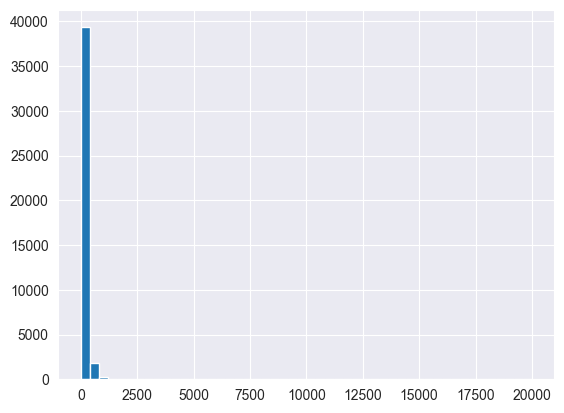

In [578]:
airbnb_df['price'].hist(bins=50)

We take the natural logarithm of the price to make the effective relationship non-linear, while still preserving the linear model. This will be very important when testing different regression models. The results of this are shown below.

<Axes: >

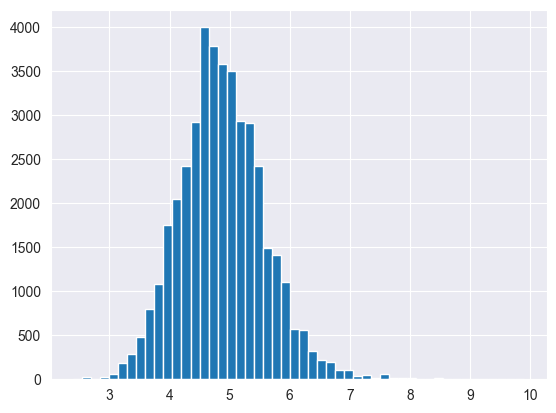

In [579]:
airbnb_df['price'] = np.log(airbnb_df['price'])

airbnb_df['price'].hist(bins=50)

## Data Preprocessing

#### Initial Feature Elimination

In [580]:
airbnb_df = airbnb_df.drop_duplicates()

First, we manually eliminated some features that were unnecessary. The features removed were id, listing_url, scrape_id, last_scraped, source, picture_url, host_id, host_url, host_thumbnail_url, host_picture_url, calendar_updated, and calendar_last_scraped.

In [581]:
airbnb_df = airbnb_df.drop(columns=['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'calendar_updated', 'calendar_last_scraped', 'host_name', 'neighbourhood_cleansed'], axis=1)

Secondly, we eliminate many location-related and listing count related columns since many of them are duplicated, and are mostly filled with null values.

In [582]:
airbnb_df = airbnb_df.drop(columns=['neighbourhood_group_cleansed', 'host_neighbourhood', 'host_location', 'neighbourhood', 'review_scores_location', 'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'review_scores_accuracy'], axis=1)

Thirdly, we eliminate redundant columns.

In [583]:
airbnb_df = airbnb_df.drop(columns=['bathrooms_text', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1)

Finally, eliminating host about and neighbourhood about because of language challenges.

In [584]:
airbnb_df = airbnb_df.drop(columns=['host_about', 'neighborhood_overview'], axis=1)

#### Handling missing values

In [585]:
airbnb_df.isnull().sum().sort_values(ascending=False)

license                           27612
host_response_time                10321
host_response_rate                10321
review_scores_value               10228
review_scores_checkin             10227
review_scores_communication       10226
review_scores_cleanliness         10225
first_review                      10181
last_review                       10181
review_scores_rating              10179
host_acceptance_rate               8183
beds                               8067
price                              8064
bathrooms                          8022
bedrooms                           2111
has_availability                   1339
description                         884
host_is_superhost                   525
host_verifications                    2
host_has_profile_pic                  2
host_identity_verified                2
host_since                            2
name                                  0
number_of_reviews_ltm                 0
instant_bookable                      0


The null in license column means that the listing doesn't have any license, so filled the column with said information.

In [586]:
airbnb_df['license'].fillna('Unlicensed', inplace=True)

Using K-nn to fill the floating point null values in the dataset since it suitable when the missing data exhibits the “Missing Completely at Random” (MCAR) or “Missing at Random” (MAR) patterns. This effectively implies that causes of the missing data are unrelated to the data.

In [587]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Preparing numerical float data for KNN
numerical_float_columns = airbnb_df.select_dtypes(include=[np.number, 'float']).columns.to_list()
selected_data = airbnb_df[numerical_float_columns]

# Perform k-NN imputation on the DataFrame
imputed_data = knn_imputer.fit_transform(selected_data)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numerical_float_columns)

# Display the DataFrame with filled missing values
imputed_df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,...,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,calculated_host_listings_count
0,45.51939,-73.56482,4.0,1.0,1.0,3.0,5.099866,2.0,60.0,23.0,...,302.0,450.0,48.0,3.0,4.67,4.62,4.81,4.77,4.68,2.0
1,45.51929,-73.56493,4.0,1.0,2.0,2.0,5.855072,2.0,21.0,24.0,...,348.0,130.0,19.0,0.0,4.73,4.66,4.88,4.81,4.73,2.0
2,45.53026,-73.58413,2.0,1.0,1.0,2.0,5.164786,32.0,730.0,21.0,...,81.0,51.0,4.0,0.0,4.86,4.86,4.92,4.90,4.76,3.0
3,45.52699,-73.55840,1.0,1.0,3.0,4.0,3.912023,31.0,60.0,21.0,...,299.0,16.0,0.0,0.0,4.50,4.25,4.81,4.81,4.38,1.0
4,45.54157,-73.60737,3.0,1.0,2.0,2.0,4.499810,3.0,28.0,0.0,...,0.0,263.0,47.0,4.0,4.95,4.94,4.97,4.98,4.93,2.0


In [588]:
# Replace the original columns in airbnb_df with the imputed ones
airbnb_df[numerical_float_columns] = imputed_df

# Display the DataFrame with filled missing values
airbnb_df.head()

,name,description,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,license,instant_bookable,calculated_host_listings_count,City
0,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,2010-05-14,within an hour,100%,98%,f,"['phone', 'work_email']",t,t,...,2024-03-16,4.67,4.62,4.81,4.77,4.68,"267153, expires: 2024-03-31",f,2.0,Montreal
1,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,2010-05-14,within an hour,100%,98%,f,"['phone', 'work_email']",t,t,...,2024-02-19,4.73,4.66,4.88,4.81,4.73,"267153, expires: 2024-03-31",f,2.0,Montreal
2,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",2011-02-07,within a few hours,94%,80%,t,"['email', 'phone']",t,t,...,2024-01-07,4.86,4.86,4.92,4.90,4.76,Unlicensed,f,3.0,Montreal
3,Beautiful room with a balcony in front of a parc,Nearest metro Papineau.,2010-07-11,within a few hours,78%,0%,f,"['email', 'phone']",t,t,...,2022-08-29,4.50,4.25,4.81,4.81,4.38,Unlicensed,f,1.0,Montreal
4,L'Arcade Douce,The appartement is sunny and ideally situated ...,2010-09-11,within an hour,100%,100%,t,"['email', 'phone']",t,t,...,2024-03-18,4.95,4.94,4.97,4.98,4.93,"271530, expires: 2024-04-30",t,2.0,Montreal


Replacing null values in host_response_rate and host_response_time with median values so that it doen't impact its relation with price column and isn't affected by outlier much.

In [589]:
airbnb_df['host_response_time'].fillna(airbnb_df['host_response_time'].mode()[0], inplace=True)
airbnb_df['host_response_rate'].fillna(airbnb_df['host_response_rate'].mode()[0], inplace=True)

review_scores related features are features where having a missing value still provided valuable information. Having a missing value meant that there were no reviews for the Airbnb listing. We elected to handle this by dropping all the rows with missing values for first_review. We had to drop these rows to preserve the linearity of the relationship between review_scores_rating and price. If we gave them all a default value of something else, the relation between the data would change.

Similarly, reving rows with null values in other columns as well since the number is low, and filling them with default values may hinder the relationship with price.

In [590]:
airbnb_df = airbnb_df.dropna(subset=['first_review'])
airbnb_df = airbnb_df.dropna(subset=['host_acceptance_rate'])
airbnb_df = airbnb_df.dropna(subset=['description'])
airbnb_df = airbnb_df.dropna(subset=['host_is_superhost'])
airbnb_df = airbnb_df.dropna(subset=['has_availability'])

In [591]:
airbnb_df.isnull().sum().sort_values(ascending=False)

name                              0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
first_review                      0
last_review                       0
review_scores_rating              0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_value               0
license                           0
instant_bookable                  0
calculated_host_listings_count    0
has_availability                  0
minimum_nights                    0
description                       0
price                             0
host_since                        0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost           

In [592]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33913 entries, 0 to 49620
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            33913 non-null  object 
 1   description                     33913 non-null  object 
 2   host_since                      33913 non-null  object 
 3   host_response_time              33913 non-null  object 
 4   host_response_rate              33913 non-null  object 
 5   host_acceptance_rate            33913 non-null  object 
 6   host_is_superhost               33913 non-null  object 
 7   host_verifications              33913 non-null  object 
 8   host_has_profile_pic            33913 non-null  object 
 9   host_identity_verified          33913 non-null  object 
 10  latitude                        33913 non-null  float64
 11  longitude                       33913 non-null  float64
 12  property_type                   33913

## Feature Engineering

#### Encoding categorical data to numerical data

In [593]:
non_numerical_columns = airbnb_df.select_dtypes(exclude=['number']).columns.tolist()

categorical_columns = airbnb_df[non_numerical_columns]

categorical_columns.head()

,name,description,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,property_type,room_type,amenities,has_availability,first_review,last_review,license,instant_bookable,City
0,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,2010-05-14,within an hour,100%,98%,f,"['phone', 'work_email']",t,t,Entire rental unit,Entire home/apt,"[""Books and reading material"", ""Paid parking l...",t,2010-06-20,2024-03-16,"267153, expires: 2024-03-31",f,Montreal
1,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,2010-05-14,within an hour,100%,98%,f,"['phone', 'work_email']",t,t,Entire home,Entire home/apt,"[""Books and reading material"", ""Coffee maker: ...",t,2012-02-23,2024-02-19,"267153, expires: 2024-03-31",f,Montreal
2,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",2011-02-07,within a few hours,94%,80%,t,"['email', 'phone']",t,t,Entire rental unit,Entire home/apt,"[""Microwave"", ""Free street parking"", ""Shampoo""...",t,2015-05-25,2024-01-07,Unlicensed,f,Montreal
3,Beautiful room with a balcony in front of a parc,Nearest metro Papineau.,2010-07-11,within a few hours,78%,0%,f,"['email', 'phone']",t,t,Private room in rental unit,Private room,"[""Carbon monoxide alarm"", ""Free street parking...",t,2011-08-20,2022-08-29,Unlicensed,f,Montreal
4,L'Arcade Douce,The appartement is sunny and ideally situated ...,2010-09-11,within an hour,100%,100%,t,"['email', 'phone']",t,t,Entire rental unit,Entire home/apt,"[""Books and reading material"", ""Electric stove...",t,2010-10-04,2024-03-18,"271530, expires: 2024-04-30",t,Montreal


Converting % data to numerical

In [594]:
# Remove % sign and convert to numeric
airbnb_df['host_response_rate'] = pd.to_numeric(airbnb_df['host_response_rate'].str.replace('%', ''))
airbnb_df['host_acceptance_rate'] = pd.to_numeric(airbnb_df['host_acceptance_rate'].str.replace('%', ''))

Converting boolean columns to numberical 0s and 1s.

In [595]:
# Changing data
airbnb_df['host_is_superhost'] = airbnb_df['host_is_superhost'].map({'f': 0, 't': 1})
airbnb_df['host_has_profile_pic'] = airbnb_df['host_has_profile_pic'].map({'f': 0, 't': 1})
airbnb_df['host_identity_verified'] = airbnb_df['host_identity_verified'].map({'f': 0, 't': 1})
airbnb_df['has_availability'] = airbnb_df['has_availability'].map({'f': 0, 't': 1})
airbnb_df['instant_bookable'] = airbnb_df['instant_bookable'].map({'f': 0, 't': 1})

Changing data in license column to licensed and unlicensed and converting to 0s and 1s

In [596]:
# Aggregating all licences, approved by government and exempt to licensed 
airbnb_df['license'] = airbnb_df['license'].apply(lambda x: 'Licensed' if (x != "Unlicensed") else x)

# Changing data
airbnb_df['license'] = airbnb_df['license'].map({'Unlicensed': 0, 'Licensed': 1})

Converting date columns from date-type to numerical. The data is current date - value in column

In [597]:
from datetime import datetime

current_date = datetime.now()

# Converting date columns
airbnb_df['host_since'] = pd.to_datetime(airbnb_df['host_since'])
airbnb_df['first_review'] = pd.to_datetime(airbnb_df['first_review'])
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

# Calculating values and storing in a new column
airbnb_df['host_since_days'] = (current_date - airbnb_df['host_since']).dt.days
airbnb_df['first_review_days'] = (current_date - airbnb_df['first_review']).dt.days
airbnb_df['last_review_days'] = (current_date - airbnb_df['last_review']).dt.days

# Dropping date columns
airbnb_df.drop(columns=['host_since', 'first_review', 'last_review'], inplace=True)

Converting columns with ordinal categorical data to numerical data using label encoding

In [598]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories
categories = ['within an hour', 'within a few hours', 'within a day', 'a few days or more']

# Initialize OrdinalEncoder with the defined categories
ordinal_encoder = OrdinalEncoder(categories=[categories])

# Fit and transform the 'host_response_time' column
airbnb_df['host_response_time_encoded'] = ordinal_encoder.fit_transform(airbnb_df[['host_response_time']])

# Dropping the categorical column
airbnb_df.drop(columns=['host_response_time'], inplace=True)


Label encoding room_type

In [599]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'room_type' column
airbnb_df['room_type_encoded'] = label_encoder.fit_transform(airbnb_df['room_type'])

# Dropping the categorical column
airbnb_df.drop(columns=['room_type'], inplace=True)

One hot encoding verifications

In [600]:
# Function to safely evaluate strings
def safe_eval(x):
    if isinstance(x, str):
        return eval(x)
    return x

# Apply the safe_eval function
airbnb_df['host_verifications'] = airbnb_df['host_verifications'].apply(safe_eval)

# Extract unique items from the list in the column
unique_items = set(item for sublist in airbnb_df['host_verifications'] for item in sublist)

# Apply one hot encoding to the unique_items and create a new column for each item
for item in unique_items:
    column_name = item + "_verification"
    airbnb_df[column_name] = airbnb_df['host_verifications'].apply(lambda x: 1 if item in x else 0)

# Drop the original amenities column
airbnb_df.drop('host_verifications', axis=1, inplace=True)

One hot encoding amenities

In [601]:
# Function to safely evaluate strings
import re

# Apply the safe_eval function
airbnb_df['amenities'] = airbnb_df['amenities'].apply(safe_eval)

# Define keywords and corresponding regex patterns
keywords_patterns = {
    'tv': r'\b(TV|HDTV|Netflix|Roku|Amazon|chromecast|hulu|disney+)\b',
    'pool': r'\b(Pool|Swimming pool)\b',
    'oven': r'\b(Oven|microwave)\b',
    'stove': r'\b(Stove|stove)\b',
    'wifi': r'\b(Wifi)\b',
    'toiletries': r'\b(Toiletries|Shampoo|Brush|Conditioner|soap|wash)\b',
    'parking': r'\b(parking)\b',
    'sound system': r'\b(SoundSystem|Sound System|speakers|speaker)\b',
    'coffee maker': r'\b(coffee|coffee-maker|coffeemaker|espresso)\b',
    'grill': r'\b(Grill|BBQ)\b',
    'workspace': r'\b(Workspace|Workspaces)\b',
    'closet': r'\b(Closet|storage|wardrobe|dresser)\b',
    'exercise equipment': r'\b(Exercise|yoga|elliptical|bike|bikes)\b',
    'refrigerator': r'\b(Refrigerator|refrigerator|)\b',
    'housekeeping': r'\b(Housekeeping|Housekeeping)\b',
    'backyard': r'\b(Backyard|Backyard|patio|balcony)\b',
    'safety': r'\b(Safety|Safety|lock|pin|alarm|)\b',
    'spa': r'\b(Sauna|sauna|jacuzzi|tub|spa)\b',
    'view': r'\b(lake|skyline)\b',
    'laundry': r'\b(Laundry|laundry|laundromat|drying|washer|dryer)\b',
    'garbage': r'\b(Garbage|garbage)\b',
    'gaming console': r'\b(Gaming console|gaming console|gaming consoles|ps3|ps4|ps5|xbox|nintendo)\b'
}

# Function to rename items based on regex patterns
def rename_items(item_list, patterns):
    renamed_list = []
    for item in item_list:
        renamed_item = item
        for keyword, pattern in patterns.items():
            if re.search(pattern, item, flags=re.IGNORECASE):
                renamed_item = keyword
                break
        renamed_list.append(renamed_item)
    return renamed_list

# Apply the function to rename items in the 'amenities' column
airbnb_df['amenities'] = airbnb_df['amenities'].apply(lambda x: rename_items(x, keywords_patterns) if isinstance(x, list) else '')

# Extract unique items from the list in the column
unique_items = set(item for sublist in airbnb_df['amenities'] for item in sublist)

# Apply one hot encoding to the unique_items and create a new column for each item
for item in unique_items:
    column_name = item + "_amenity"
    airbnb_df[column_name] = airbnb_df['amenities'].apply(lambda x: 1 if item in x else 0)

# Drop the original amenities column
airbnb_df.drop('amenities', axis=1, inplace=True)

Target encoding property type

In [602]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

# Split data into training and test sets
train_df, test_df = train_test_split(airbnb_df, test_size=0.2, random_state=1)

# Initialize and fit target encoder on training data
encoder = TargetEncoder(cols=['property_type'])
train_df['property_type_encoded'] = encoder.fit_transform(train_df['property_type'], train_df['price'])

# Transform test data using the encoder fitted on training data
test_df['property_type_encoded'] = encoder.transform(test_df['property_type'])

# Update the original 'property_type' column with encoded values
airbnb_df.loc[train_df.index, 'property_type_encoded'] = train_df['property_type_encoded']
airbnb_df.loc[test_df.index, 'property_type_encoded'] = test_df['property_type_encoded']

# Drop the intermediate 'property_type_encoded' column if desired
airbnb_df.drop(columns=['property_type'], inplace=True)

Target encoding city

In [603]:
# Initialize and fit target encoder on training data
encoder = TargetEncoder(cols=['City'])
train_df['city_encoded'] = encoder.fit_transform(train_df['City'], train_df['price'])

# Transform test data using the encoder fitted on training data
test_df['city_encoded'] = encoder.transform(test_df['City'])

# Update the original 'property_type' column with encoded values
airbnb_df.loc[train_df.index, 'city_encoded'] = train_df['city_encoded']
airbnb_df.loc[test_df.index, 'city_encoded'] = test_df['city_encoded']

# Drop the intermediate 'property_type_encoded' column if desired
airbnb_df.drop(columns=['City'], inplace=True)

Encoding name and description with sentiment scores

In [604]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#creating an object of sentiment intensity analyzer
sia= SentimentIntensityAnalyzer()

#creating new column scores using polarity scores function
airbnb_df['name_scores'] = airbnb_df['name'].apply(lambda name: sia.polarity_scores(str(name)))
airbnb_df['name_sentiment']=airbnb_df['name_scores'].apply(lambda score_dict:score_dict['compound'])
airbnb_df.drop(['name', 'name_scores'], axis=1, inplace=True)

#creating new column scores using polarity scores function
airbnb_df['description_scores']=airbnb_df['description'].apply(lambda description: sia.polarity_scores(str(description)))
airbnb_df['description_sentiment']=airbnb_df['description_scores'].apply(lambda score_dict:score_dict['compound'])
airbnb_df.drop(['description', 'description_scores'], axis=1, inplace=True)

In [605]:
airbnb_df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,oven_amenity,tv_amenity,sound system_amenity,pool_amenity,closet_amenity,exercise equipment_amenity,property_type_encoded,city_encoded,name_sentiment,description_sentiment
0,100,98,0,1,1,45.51939,-73.56482,4.0,1.0,1.0,...,1,1,1,0,1,0,4.893650,4.702944,0.5859,0.6908
1,100,98,0,1,1,45.51929,-73.56493,4.0,1.0,2.0,...,1,1,1,0,1,0,5.275912,4.702944,0.0000,0.9153
2,94,80,1,1,1,45.53026,-73.58413,2.0,1.0,1.0,...,1,1,0,0,0,0,4.893650,4.702944,0.7096,0.9510
3,78,0,0,1,1,45.52699,-73.55840,1.0,1.0,3.0,...,1,1,0,0,0,0,4.239018,4.702944,0.5994,0.0000
4,100,100,1,1,1,45.54157,-73.60737,3.0,1.0,2.0,...,1,1,0,0,1,0,4.893650,4.702944,0.0000,0.7506


## EXTRA

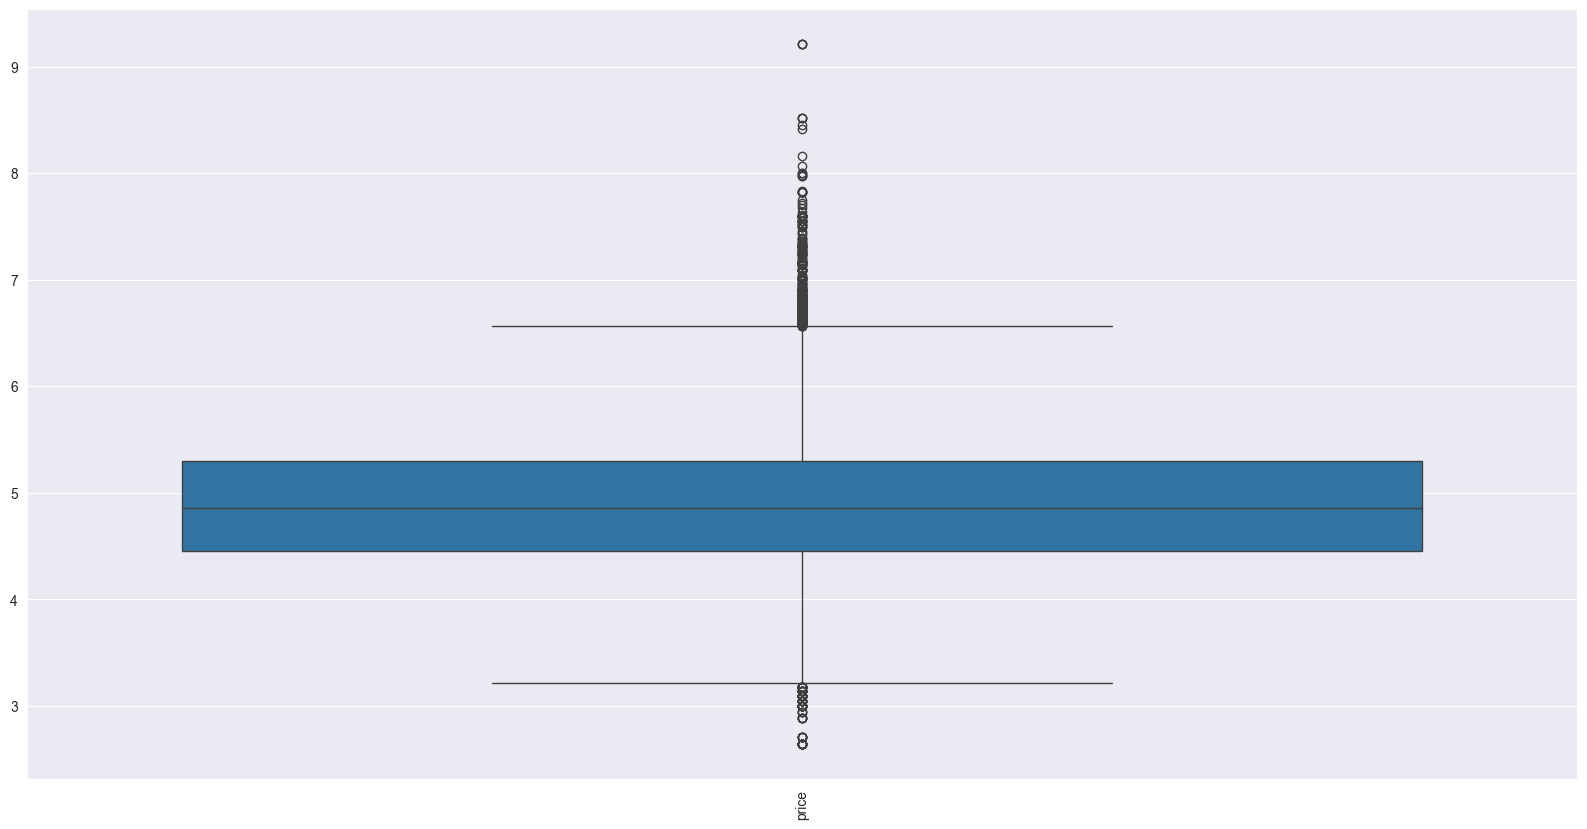

In [606]:
# Checking for outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=airbnb_df[['price']])
plt.xticks(rotation=90)
plt.show()

In [607]:
# Handling Outliers using median and IQR 
def outlier(a):
    Q1 = a.quantile(0.25)
    Q3 = a.quantile(0.75)
    IQR = Q3-Q1
    L = Q1 - 1.5*IQR
    U = Q3 + 1.5*IQR
    return(L,U)

# Price
airbnb_df = airbnb_df.loc[airbnb_df['price'] >= outlier(airbnb_df['price'])[0]]
airbnb_df = airbnb_df.loc[airbnb_df['price'] <= outlier(airbnb_df['price'])[1]]
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33417 entries, 0 to 49620
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              33417 non-null  int64  
 1   host_acceptance_rate            33417 non-null  int64  
 2   host_is_superhost               33417 non-null  int64  
 3   host_has_profile_pic            33417 non-null  int64  
 4   host_identity_verified          33417 non-null  int64  
 5   latitude                        33417 non-null  float64
 6   longitude                       33417 non-null  float64
 7   accommodates                    33417 non-null  float64
 8   bathrooms                       33417 non-null  float64
 9   bedrooms                        33417 non-null  float64
 10  beds                            33417 non-null  float64
 11  price                           33417 non-null  float64
 12  minimum_nights                  33417

In [608]:
# which features have the highest correlation with price
airbnb_df.corr()['price'].sort_values(ascending=False)

price                             1.000000
property_type_encoded             0.544979
accommodates                      0.541998
bedrooms                          0.471927
beds                              0.414568
bathrooms                         0.306676
tv_amenity                        0.289402
city_encoded                      0.278396
license                           0.225124
coffee maker_amenity              0.219048
grill_amenity                     0.191627
toiletries_amenity                0.167670
stove_amenity                     0.149490
pool_amenity                      0.149439
review_scores_cleanliness         0.141556
sound system_amenity              0.141094
exercise equipment_amenity        0.134087
review_scores_rating              0.129470
description_sentiment             0.121727
parking_amenity                   0.109415
oven_amenity                      0.099493
latitude                          0.091276
review_scores_value               0.089954
review_scor

### Dimentionality Reduction

In [618]:
airbnb_df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,oven_amenity,tv_amenity,sound system_amenity,pool_amenity,closet_amenity,exercise equipment_amenity,property_type_encoded,city_encoded,name_sentiment,description_sentiment
0,100,98,0,1,1,45.51939,-73.56482,4.0,1.0,1.0,...,1,1,1,0,1,0,4.893650,4.702944,0.5859,0.6908
1,100,98,0,1,1,45.51929,-73.56493,4.0,1.0,2.0,...,1,1,1,0,1,0,5.275912,4.702944,0.0000,0.9153
2,94,80,1,1,1,45.53026,-73.58413,2.0,1.0,1.0,...,1,1,0,0,0,0,4.893650,4.702944,0.7096,0.9510
3,78,0,0,1,1,45.52699,-73.55840,1.0,1.0,3.0,...,1,1,0,0,0,0,4.239018,4.702944,0.5994,0.0000
4,100,100,1,1,1,45.54157,-73.60737,3.0,1.0,2.0,...,1,1,0,0,1,0,4.893650,4.702944,0.0000,0.7506


PCA on select feature groups

In [609]:
# from sklearn.decomposition import PCA
# 
# # Select feature group 1
# host_features = airbnb_df[['host_response_rate', 'host_acceptance_rate', 'host_identity_verified', 'host_is_superhost', 'host_has_profile_pic', 'host_response_time_encoded', 'host_since_days', 'email_verification', 'phone_verification', 'work_email_verification', 'photographer_verification']]
# 
# # Standardize features (mean = 0 and variance = 1)
# scaler = StandardScaler()
# host_features_scaled = scaler.fit_transform(host_features)
# 
# # Initialize PCA with desired number of components
# pca = PCA(n_components=3)
# 
# # Fit PCA and transform the features
# principal_components = pca.fit_transform(host_features_scaled)
# 
# # Add PCA components to DataFrame
# host_features_scaled['host_PC1'] = principal_components[:, 0]
# host_features_scaled['host_PC2'] = principal_components[:, 1]
# host_features_scaled['host_PC3'] = principal_components[:, 2]
# 
# host_features_scaled.head()

In [610]:
from sklearn import preprocessing
from sklearn.feature_selection import RFECV 
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree classifier 
estimator = DecisionTreeRegressor() 
  
# Use RFE with cross-validation to  
# find the optimal number of features 
selector = RFECV(estimator, cv=5) 
y = airbnb_df['price']
X = np.array(airbnb_df.drop(['price'], axis = 1))
X_scaled = preprocessing.scale(X)
selector = selector.fit(X_scaled, y) 
  
# Print the optimal number of features 
print("Optimal number of features: %d" % selector.n_features_) 
  
# Print the selected features 
print("Selected features: %s" % selector.support_) 

print("Feature Ranking: %s" % selector.ranking_)
#Print the selected columns names with its score and rank
selected_columns = []

for i in range(len(selector.ranking_)):
    if selector.ranking_[i] == 1:
        selected_columns.append(airbnb_df.columns[i])
        print(airbnb_df.columns[i], selector.ranking_[i])

# selected_columns

cleaned_df = airbnb_df[selected_columns]
cleaned_df

Optimal number of features: 17
Selected features: [False False False False False  True  True  True  True  True  True False
 False False False  True False  True False False False  True False False
 False False  True False  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False  True  True False  True]
Feature Ranking: [16  5 27 36 34  1  1  1  1  1  1  2 10 39  9  1  6  1  3  8 18  1  4 11
 14  7  1 25  1  1  1  1 21 20 29 37 31 40 12 26 32 33 23 38 22 35 28 15
 24 17 30 19  1  1 13  1]
latitude 1
longitude 1
accommodates 1
bathrooms 1
bedrooms 1
beds 1
availability_30 1
availability_90 1
number_of_reviews_l30d 1
review_scores_value 1
instant_bookable 1
calculated_host_listings_count 1
host_since_days 1
first_review_days 1
exercise equipment_amenity 1
property_type_encoded 1
name_sentiment 1


,latitude,longitude,accommodates,bathrooms,bedrooms,beds,availability_30,availability_90,number_of_reviews_l30d,review_scores_value,instant_bookable,calculated_host_listings_count,host_since_days,first_review_days,exercise equipment_amenity,property_type_encoded,name_sentiment
0,45.519390,-73.564820,4.0,1.0,1.0,3.0,23.0,76.0,3.0,4.68,0,2.0,5179,5142,0,4.893650,0.5859
1,45.519290,-73.564930,4.0,1.0,2.0,2.0,24.0,78.0,0.0,4.73,0,2.0,5179,4529,0,5.275912,0.0000
2,45.530260,-73.584130,2.0,1.0,1.0,2.0,21.0,81.0,0.0,4.76,0,3.0,4910,3342,0,4.893650,0.7096
3,45.526990,-73.558400,1.0,1.0,3.0,4.0,21.0,30.0,0.0,4.38,0,1.0,5121,4716,0,4.239018,0.5994
4,45.541570,-73.607370,3.0,1.0,2.0,2.0,0.0,0.0,4.0,4.93,1,2.0,5059,5036,0,4.893650,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49605,49.952550,-97.059280,2.0,2.0,1.0,1.0,30.0,90.0,2.0,5.00,0,1.0,3595,125,0,4.290483,0.4939
49607,49.889437,-97.140191,2.0,1.0,0.0,1.0,5.0,5.0,1.0,5.00,0,18.0,2287,133,0,4.893650,0.0516
49608,49.886814,-97.139958,2.0,1.0,1.0,1.0,16.0,40.0,1.0,5.00,0,1.0,991,130,0,4.239018,0.0000
49614,49.799496,-97.199878,4.0,1.0,2.0,2.0,21.0,46.0,4.0,5.00,0,1.0,136,130,0,4.867532,0.0000


In [ ]:
cleaned_df

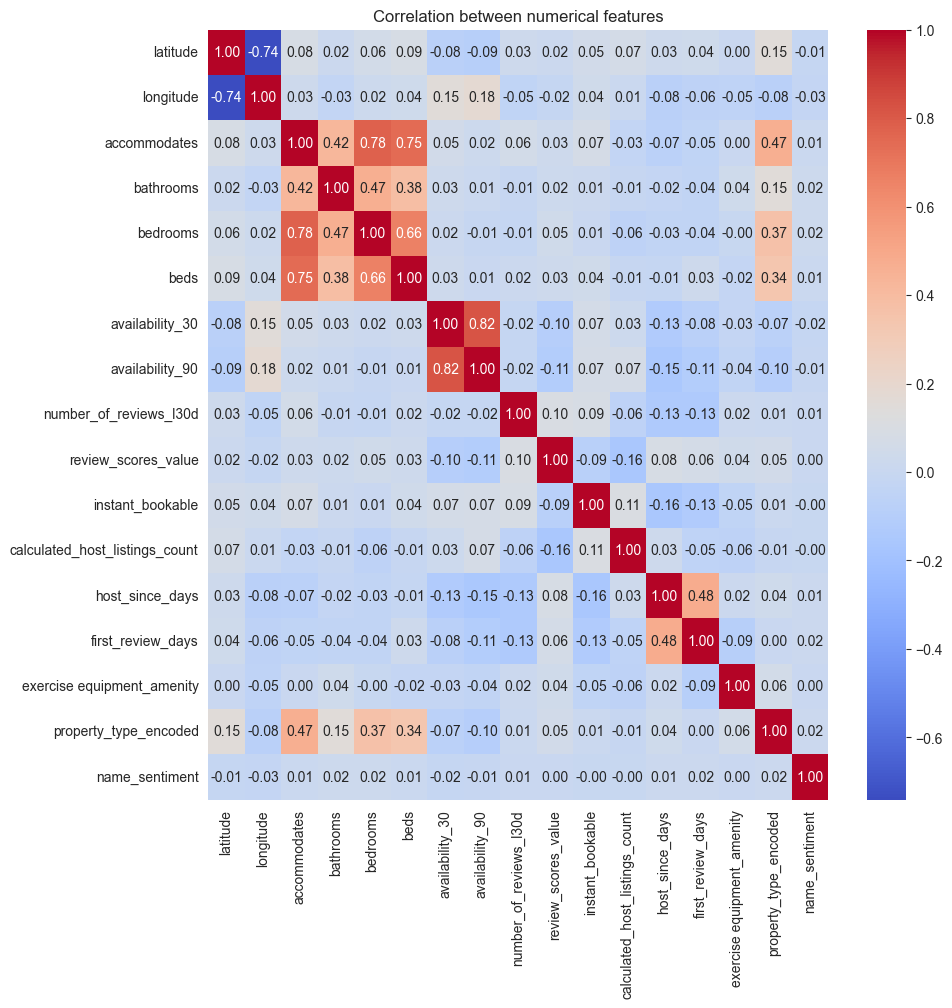

price                             1.000000
property_type_encoded             0.544979
accommodates                      0.541998
bedrooms                          0.471927
beds                              0.414568
bathrooms                         0.306676
tv_amenity                        0.289402
city_encoded                      0.278396
license                           0.225124
coffee maker_amenity              0.219048
grill_amenity                     0.191627
toiletries_amenity                0.167670
stove_amenity                     0.149490
pool_amenity                      0.149439
review_scores_cleanliness         0.141556
sound system_amenity              0.141094
exercise equipment_amenity        0.134087
review_scores_rating              0.129470
description_sentiment             0.121727
parking_amenity                   0.109415
oven_amenity                      0.099493
latitude                          0.091276
review_scores_value               0.089954
review_scor

In [612]:
plt.figure(figsize=(10,10))
sns.heatmap(cleaned_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between numerical features')
plt.show()

#which features have the highest correlation with price
airbnb_df.corr()['price'].sort_values(ascending=False)

## Model Building

In [613]:
#Split the data into training and testing data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = cleaned_df.drop('price', axis=1) #features
y = cleaned_df['price'] #target

#80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

KeyError: "['price'] not found in axis"

In [ ]:
#Linear Regression

model = LinearRegression()
# Training the model
model.fit(X_train, y_train)

# Predicting the price
y_pred = model.predict(X_test)

# Calculating and printing the evaluation metrices values
print(f'Linear Regression Fitting:')
print(f'R2 Score: {r2_score(y_test, y_pred)}') # How well the variation in target variable is successfully defined by variation in input features.
print(f'MAE: {mean_absolute_error(y_test, y_pred)}') # Best when there are many outliers
print(f'MSE: {mean_squared_error(y_test, y_pred)}') # Best when there are less outliers
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

In [ ]:
# Lasso Regression

model = Lasso()
# Training the model
model.fit(X_train, y_train)

# Predicting the price
y_pred = model.predict(X_test)

# Calculating and printing the evaluation metrices values
print(f'Lasso Regression Fitting:')
print(f'R2 Score: {r2_score(y_test, y_pred)}') 
print(f'MAE: {mean_absolute_error(y_test, y_pred)}') 
print(f'MSE: {mean_squared_error(y_test, y_pred)}') 
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

In [ ]:
# Ridge Regression
from numpy import arange
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold



# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=5)

model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# Training the model
model.fit(X_train, y_train)

# summarize chosen configuration
print('alpha: %f' % model.alpha_)

In [ ]:
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
# Ridge Regression

model = Ridge()
# Training the model
model.fit(X_train, y_train)

# Predicting the price
y_pred = model.predict(X_test)

# Calculating and printing the evaluation metrices values
print(f'Ridge Regression Fitting:')
print(f'R2 Score: {r2_score(y_test, y_pred)}') 
print(f'MAE: {mean_absolute_error(y_test, y_pred)}') 
print(f'MSE: {mean_squared_error(y_test, y_pred)}') 
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

In [ ]:
# ElasticNet Regression

model = ElasticNet()
# Training the model
model.fit(X_train, y_train)

# Predicting the price
y_pred = model.predict(X_test)

# Calculating and printing the evaluation metrices values
print(f'ElasticNet Regression Fitting:')
print(f'R2 Score: {r2_score(y_test, y_pred)}') 
print(f'MAE: {mean_absolute_error(y_test, y_pred)}') 
print(f'MSE: {mean_squared_error(y_test, y_pred)}') 
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
